In [2]:
import pandas as pd
import requests 
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [3]:
from bs4 import BeautifulSoup

In [4]:
# Save all the html in a string variable
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# This "document" variable is an object that has a "find" method
for i in document.find_all("h3"):
    print(i.text.strip())

Aids
Airlines
Billionaires
Broadway
Business Dynamics
Cancer
Cars
Classics
Construction Permits
Construction Spending
County Demographics
Covid
Drugs
Earthquakes
Election
Electricity
Emissions
Energy
Finance
Food
Food Access
Global Development
Graduates
Health
Hospitals
Hydropower
Ingredients
Injuries
Labor
Medal Of Honor
Music
Opioids
Police Shootings
Publishers
Real Estate
Retail Services
School Scores
Skyscrapers
Slavery
State Crime
State Demographics
State Fragility
Suicide Attacks
Supreme Court
Tate
Video Games
Weather
Wind Turbines


In [5]:
def pdcorgis(a):
    dataset = a.lower()
    dataset= dataset.replace(' ', '_')
    url = 'https://corgis-edu.github.io/corgis/csv/' + dataset
    response = requests.get(url)
    # Save all the html in a string variable
    html_string = response.text
    
    # Use BeautifulSoup to create a new object that will allow you to search for HTML tags
    document = BeautifulSoup(html_string, "html.parser")

    # This "document" variable is an object that has a "find" method
    link = ''
    for i in document.find_all("a"):
        #print(i.text.strip())
        if i.has_attr('download'):
            link = i['href']
            link = url + '/' + link
            print(link)
        if link != '':
            corgisdf = pd.read_csv(link)
        else:
            corgis = None
    return corgisdf
            

In [6]:
food = pdcorgis('food access')
food.head()

https://corgis-edu.github.io/corgis/csv/food_access/../../datasets/csv/food_access/food_access.csv


,County,Population,State,Housing Data.Residing in Group Quarters,Housing Data.Total Housing Units,Vehicle Access.1 Mile,Vehicle Access.1/2 Mile,Vehicle Access.10 Miles,Vehicle Access.20 Miles,Low Access Numbers.Children.1 Mile,...,Low Access Numbers.Low Income People.10 Miles,Low Access Numbers.Low Income People.20 Miles,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Low Access Numbers.Seniors.1 Mile,Low Access Numbers.Seniors.1/2 Mile,Low Access Numbers.Seniors.10 Miles,Low Access Numbers.Seniors.20 Miles
0,Autauga County,54571,Alabama,455.0,20221,834.0,1045.0,222.0,0.0,9973.0,...,2307.0,0.0,37424.0,49497.0,5119.0,0.0,4393.0,5935.0,707.0,0.0
1,Baldwin County,182265,Alabama,2307.0,73180,1653.0,2178.0,32.0,0.0,30633.0,...,846.0,0.0,132442.0,165616.0,2308.0,0.0,21828.0,27241.0,390.0,0.0
2,Barbour County,27457,Alabama,3193.0,9820,545.0,742.0,201.0,0.0,3701.0,...,2440.0,0.0,19007.0,23762.0,4643.0,0.0,2537.0,3348.0,629.0,0.0
3,Bibb County,22915,Alabama,2224.0,7953,312.0,441.0,0.0,0.0,4198.0,...,102.0,0.0,17560.0,20989.0,365.0,0.0,2262.0,2630.0,72.0,0.0
4,Blount County,57322,Alabama,489.0,21578,752.0,822.0,0.0,0.0,12575.0,...,0.0,0.0,50848.0,54933.0,0.0,0.0,7114.0,7810.0,0.0,0.0


<AxesSubplot:title={'center':'Total Low Food Access People (10 miles) per California county'}, ylabel='Frequency'>

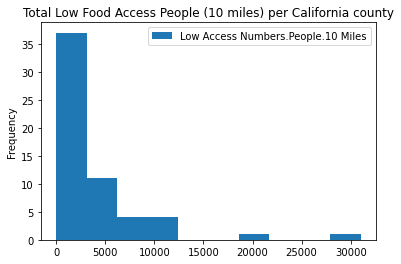

In [28]:
cali = food[food.State=='California']
cali.plot.hist(y='Low Access Numbers.People.10 Miles', title = "Total Low Food Access People (10 miles) per California county")

In [30]:
health = pdcorgis('health')
health.head()

https://corgis-edu.github.io/corgis/csv/health/../../datasets/csv/health/health.csv


,disease,increase,loc,number,population,year
0,MEASLES,334.99,ALABAMA,8843,2640000,1928
1,MEASLES,200.75,ARIZONA,847,422000,1928
2,MEASLES,481.77,ARKANSAS,8899,1847000,1928
3,MEASLES,69.22,CALIFORNIA,3698,5344000,1928
4,MEASLES,206.98,COLORADO,2099,1014000,1928


<AxesSubplot:title={'center':'Top 10 States with the most measles cases in 1928'}, xlabel='loc'>

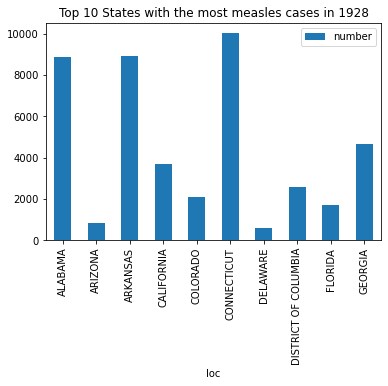

In [67]:
health.sort_values(by='number', ascending=True)
health_small = health[(health.disease == 'MEASLES') & (health.year == 1928)].loc[0:9]
health_small.plot.bar(x='loc', y='number', title='Top 10 States with the most measles cases in 1928')

In [34]:
cars = pdcorgis('cars')
cars.head()

https://corgis-edu.github.io/corgis/csv/cars/../../datasets/csv/cars/cars.csv


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


<AxesSubplot:title={'center':'MPG of City vs Highway'}, xlabel='Fuel Information.City mpg'>

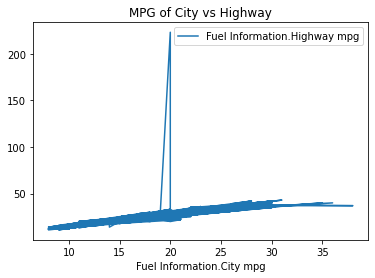

In [53]:
cars.sort_values(by='Fuel Information.City mpg', ascending=True)
cars.plot.line(y='Fuel Information.Highway mpg', x='Fuel Information.City mpg', title = "MPG of City vs Highway")
